# Task 4

* In this task we are going to visualize the decision tree of Iris flower dataset
* The data is located in the `iris.csv` file

## (1) Importing necessary things...

In [1]:
#Getting our things ready...
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
%matplotlib inline

## (2) Reading the csv file...

In [2]:
#importing our data stored in csv file.
df = pd.read_csv('iris.csv')
df.drop('Id',axis=1,inplace=True)

## (3) Splitting the training data...


In [3]:
# Splitting the data into training and test sets..
x = df.drop('Species',axis=1)
y = df['Species']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state= 0)

## (4) Generating Classification report getting the best parameters

In [4]:
dtc = DecisionTreeClassifier(random_state = 0)
grid3 = {'criterion':["gini", "entropy"] , 'max_depth': range(1,10) }

gs = GridSearchCV(dtc,grid3,cv=5)
gs.fit(x_train,y_train)

# Accuracy
print(f'Training Set score is  {gs.score(x_train,y_train)}')
print(f'Test Set score is  {gs.score(x_test,y_test)}')

#Predicting the accuracy
print(f'For parameters {gs.best_params_} we get best accuracy of {(gs.score(x_test,y_test))*100} %')
print('--------------------------------------------------------------------------------------------------------')

# Classification Report
print('\n\nThe Classification report')
print(classification_report(y_test,gs.predict(x_test)))

Training Set score is  1.0
Test Set score is  1.0
For parameters {'criterion': 'gini', 'max_depth': 5} we get best accuracy of 100.0 %
--------------------------------------------------------------------------------------------------------


The Classification report
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00         6

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



## (5) Plot

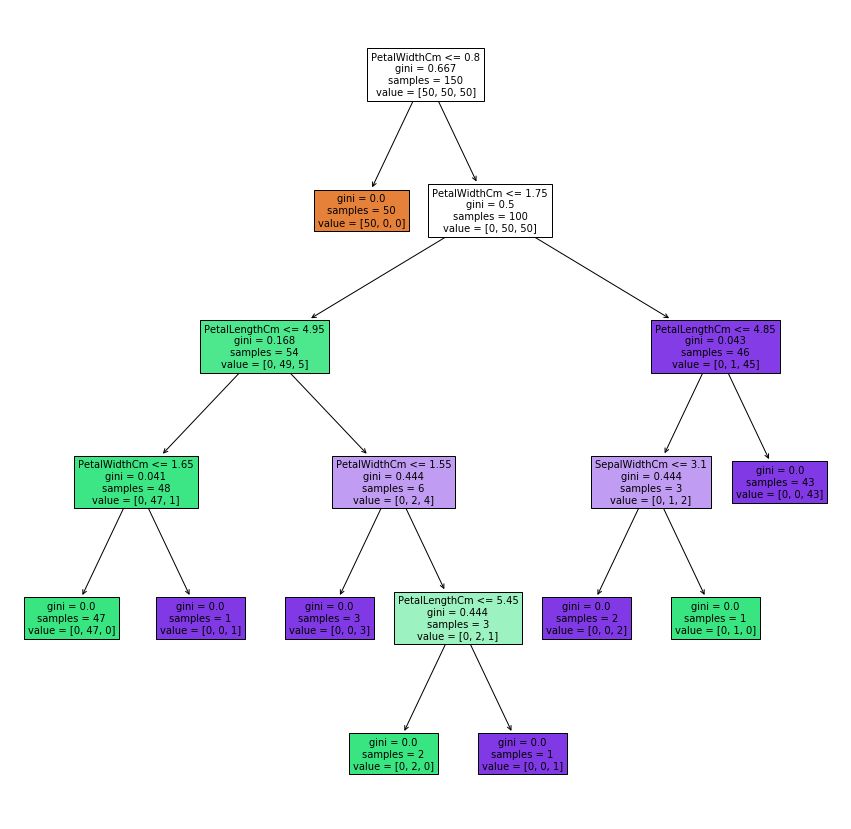

In [5]:
plt.figure(figsize=(15,15))
dtc = DecisionTreeClassifier(criterion='gini',max_depth=5,random_state=0)
dtc.fit(x,y)
plot_tree(dtc, filled=True,feature_names=df.columns)
plt.show()

# Thanks